In [23]:
import json
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

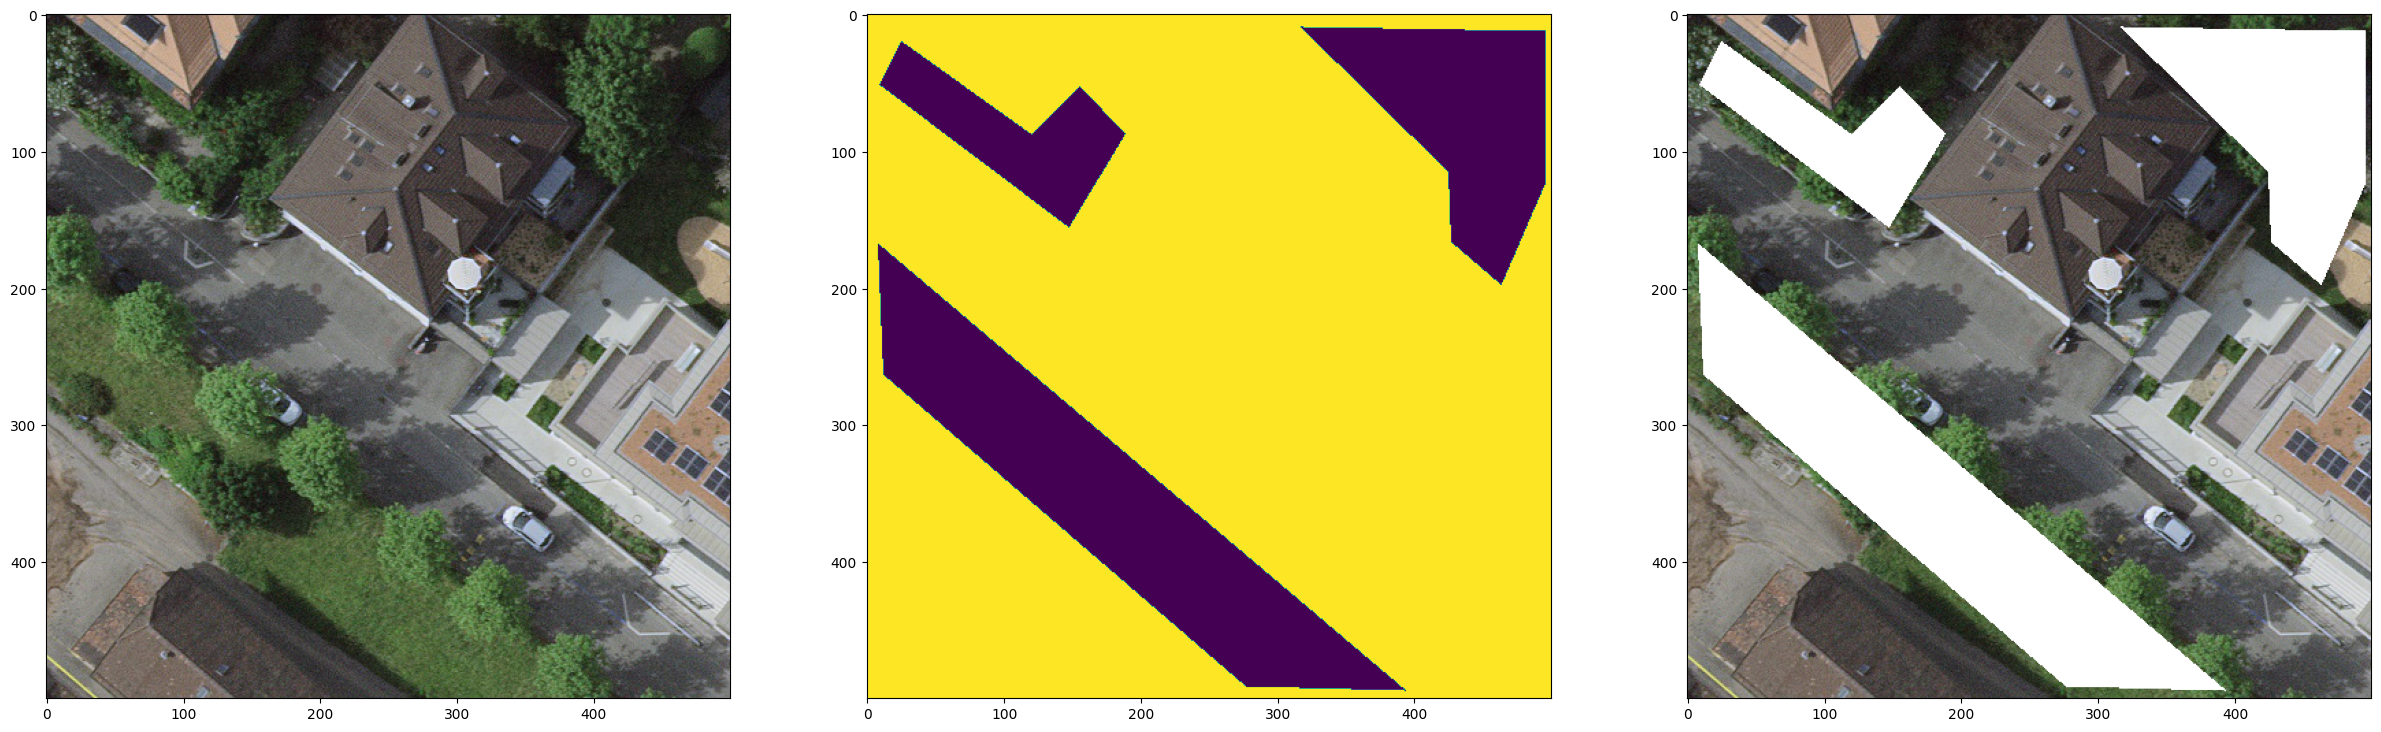

In [89]:
def find_and_load_image_from_json(json_data)-> Image:
    img_name = json_data['task']['data']['image'].split('/')[-1]
    local_image_path = os.path.join(local_image_folder, img_name)
    img = Image.open(local_image_path)
    return local_image_path, img

def add_polygon_mask_to_img(img, points) -> None:
    draw = ImageDraw.Draw(img)
    draw.polygon(points, fill=0)

def draw_multiple_polygons_to_image(img) -> None:
    for area_json_data in json_data['result']:
        polygon = area_json_data['value']
        points = np.round(np.array(polygon['points'])*img.size/100).astype(int)
        points = [tuple(p) for p in points]
        add_polygon_mask_to_img(img, points)

def create_mask_from_json(json_data, save_in_image_folder=True):
    local_image_path, img = find_and_load_image_from_json(json_data)
    mask = Image.new('L', img.size, 255)
    draw_multiple_polygons_to_image(mask)

    if save_in_image_folder:
        local_mask_path = local_image_path.replace('.png','_mask.png')
        mask.save(local_mask_path)

    return img, mask

local_image_folder = '../grid/'
local_label_folder = '../labeled/'

for file in os.listdir(local_label_folder):
    with open(os.path.join(local_label_folder, file)) as file_path:
        json_data = json.load(file_path)

    img, mask = create_mask_from_json(json_data, save_in_image_folder=True)

#Save mask to file
mask_overlay = Image.new('RGBA', img.size, (255,255,255,0))
mask_overlay.paste(img, mask=mask)

fig, ax = plt.subplots(1,3, figsize=(30,10))
ax[0].imshow(img)
ax[1].imshow(mask)
ax[2].imshow(mask_overlay)